In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_dataset.csv")
train.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,Yes,Yes,Yes,28.0,No,No,Yes,Yes,Yes,...,Yes,No,3.0,0.0,0.0,No,Male,10.0,6.0,6.0
1,1.0,No,Yes,Yes,38.0,No,No,No,No,Yes,...,No,Yes,4.0,7.0,0.0,No,Female,3.0,5.0,6.0
2,2.0,No,Yes,Yes,NaN,Yes,No,No,No,Yes,...,Yes,No,4.0,30.0,0.0,No,Male,7.0,4.0,1.0
3,2.0,Yes,No,Yes,28.0,Yes,No,No,Yes,No,...,Yes,No,2.0,0.0,0.0,No,Male,11.0,6.0,6.0
4,0.0,No,Yes,Yes,20.0,Yes,No,No,No,Yes,...,Yes,No,4.0,30.0,30.0,Yes,Female,7.0,2.0,2.0
5,0.0,No,No,Yes,36.0,No,No,No,Yes,Yes,...,Yes,No,3.0,3.0,3.0,No,Female,5.0,4.0,5.0
6,0.0,Yes,Yes,Yes,28.0,No,No,No,No,Yes,...,No,No,3.0,0.0,0.0,No,Male,8.0,3.0,2.0
7,2.0,No,No,Yes,36.0,No,No,No,No,Yes,...,Yes,No,3.0,2.0,0.0,No,Female,11.0,5.0,3.0
8,0.0,No,Yes,Yes,25.0,No,No,No,Yes,Yes,...,Yes,No,2.0,15.0,0.0,No,Female,10.0,5.0,7.0
9,0.0,Yes,No,Yes,22.0,Yes,Yes,Yes,Yes,Yes,...,Yes,No,2.0,5.0,0.0,No,Male,11.0,4.0,3.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51018 entries, 0 to 51017
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          51018 non-null  float64
 1   HighBP                51018 non-null  object 
 2   HighChol              51018 non-null  object 
 3   CholCheck             51018 non-null  object 
 4   BMI                   50218 non-null  float64
 5   Smoker                51018 non-null  object 
 6   Stroke                51018 non-null  object 
 7   HeartDiseaseorAttack  51018 non-null  object 
 8   PhysActivity          50905 non-null  object 
 9   Fruits                51018 non-null  object 
 10  Veggies               50900 non-null  object 
 11  HvyAlcoholConsump     51018 non-null  object 
 12  AnyHealthcare         51018 non-null  object 
 13  NoDocbcCost           51018 non-null  object 
 14  GenHlth               51018 non-null  float64
 15  MentHlth           

In [4]:
train.duplicated().sum()

1347

In [5]:
train = train.drop_duplicates()

In [6]:
train.isnull().sum()

Diabetes_012              0
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                     797
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity            113
Fruits                    0
Veggies                 118
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   0
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                     548
Education                 0
Income                  566
dtype: int64

In [7]:
train = train.dropna()

Dataset Details:
 
1.    Diabetes_012: Target variable indicating whether the respondent has diabetes (2), pre-diabetes (1), or no diabetes (0)
2.    HighBP: Binary variable indicating whether the respondent has high blood pressure (Yes-1) or not (No-0)
3.    HighChol: Binary variable indicating whether the respondent has high cholesterol (Yes-1) or not (No-0))
4.    CholCheck: Binary variable indicating whether the respondent has had their cholesterol checked in the past year (Yes-1) or not (No-0))
5.    BMI: Body mass index of the respondent, calculated as weight in kilograms divided by height in meters squared
6.    Smoker: Binary variable indicating whether the respondent is a current smoker (Yes-1) or not (No-0))
7.    Stroke: Binary variable indicating whether the respondent has had a stroke (Yes-1) or not (No-0))
8.    HeartDiseaseorAttack: Binary variable indicating whether the respondent has had heart disease or a heart attack (Yes-1) or not (No-0))
9.    PhysActivity: Binary variable indicating whether the respondent engages in regular physical activity (Yes-1) or not (No-0))
10.    Fruits: Consume Fruit 1 or more times per day (Yes-1) or not (No-0))
11.    Veggies: Consume Vegetables 1 or more times per day (Yes-1) or not (No-0))
12.    HvyAlcoholConsump: Binary variable indicating whether the respondent engages in heavy alcohol consumption (Yes-1) or not (No-0))
13.    AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. (Yes-1) or not (No-0))
14.    NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes-1) or not (No-0))
15.    GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16.    MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
17.    PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
18.    DiffWalk: Binary variable indicating whether the respondent has difficulty walking (Yes-1) or not (No-0))
19.    Sex: Binary variable indicating the gender of the respondent (Male-1) or not (Female-0))
20.    Age: 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older
21.    Education: Level of education attained by the respondent (1 for less than high school, 2 for high school or equivalent, 3 for some college, and 4 for college graduate or higher)
22.    Income: Annual household income of the respondent, reported in US dollars

In [8]:
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
object_columns = train.select_dtypes(include=['object']).columns

numerical_df = train[numerical_columns]
object_df = train[object_columns]

print("Numerical DataFrame:")
print(numerical_df.head())

print("\nObject DataFrame:")
print(object_df.head())

Numerical DataFrame:
   Diabetes_012   BMI  GenHlth  MentHlth  PhysHlth   Age  Education  Income
0           0.0  28.0      3.0       0.0       0.0  10.0        6.0     6.0
1           1.0  38.0      4.0       7.0       0.0   3.0        5.0     6.0
3           2.0  28.0      2.0       0.0       0.0  11.0        6.0     6.0
4           0.0  20.0      4.0      30.0      30.0   7.0        2.0     2.0
5           0.0  36.0      3.0       3.0       3.0   5.0        4.0     5.0

Object DataFrame:
  HighBP HighChol CholCheck Smoker Stroke HeartDiseaseorAttack PhysActivity  \
0    Yes      Yes       Yes     No     No                  Yes          Yes   
1     No      Yes       Yes     No     No                   No           No   
3    Yes       No       Yes    Yes     No                   No          Yes   
4     No      Yes       Yes    Yes     No                   No           No   
5     No       No       Yes     No     No                   No          Yes   

  Fruits Veggies HvyAlcoholCo

In [9]:
object_df.nunique()

HighBP                  2
HighChol                2
CholCheck               2
Smoker                  2
Stroke                  2
HeartDiseaseorAttack    2
PhysActivity            2
Fruits                  2
Veggies                 2
HvyAlcoholConsump       2
AnyHealthcare           2
NoDocbcCost             2
DiffWalk                2
Sex                     2
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in object_df.columns:
    object_df.loc[:, column] = label_encoder.fit_transform(object_df[column])

object_df.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,1,1,1,0,0,1,1,1,1,0,1,0,0,1
1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,0,0,1,0,1,0,1,0,0,1
4,0,1,1,1,0,0,0,1,1,0,1,0,1,0
5,0,0,1,0,0,0,1,1,1,0,1,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [col for col in numerical_df.columns if col != 'Diabetes_012']

scaler = StandardScaler()

numerical_df[numerical_columns] = scaler.fit_transform(numerical_df[numerical_columns])

numerical_df.head()

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,0.0,-0.162349,0.291353,-0.451807,-0.533780,0.558874,1.022132,0.068517
1,1.0,1.303820,1.213316,0.441704,-0.533780,-1.779938,0.033671,0.068517
3,2.0,-0.162349,-0.630609,-0.451807,-0.533780,0.892990,1.022132,0.068517
4,0.0,-1.335284,1.213316,3.377525,2.655259,-0.443474,-2.931713,-1.812304
5,0.0,1.010586,0.291353,-0.068873,-0.214876,-1.111706,-0.954791,-0.401688


In [12]:
train_df = pd.concat([numerical_df, object_df], axis=1)

train_df.head()

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,HighBP,HighChol,...,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,-0.162349,0.291353,-0.451807,-0.533780,0.558874,1.022132,0.068517,1,1,...,0,1,1,1,1,0,1,0,0,1
1,1.0,1.303820,1.213316,0.441704,-0.533780,-1.779938,0.033671,0.068517,0,1,...,0,0,0,1,0,0,0,1,0,0
3,2.0,-0.162349,-0.630609,-0.451807,-0.533780,0.892990,1.022132,0.068517,1,0,...,0,0,1,0,1,0,1,0,0,1
4,0.0,-1.335284,1.213316,3.377525,2.655259,-0.443474,-2.931713,-1.812304,0,1,...,0,0,0,1,1,0,1,0,1,0
5,0.0,1.010586,0.291353,-0.068873,-0.214876,-1.111706,-0.954791,-0.401688,0,0,...,0,0,1,1,1,0,1,0,0,0


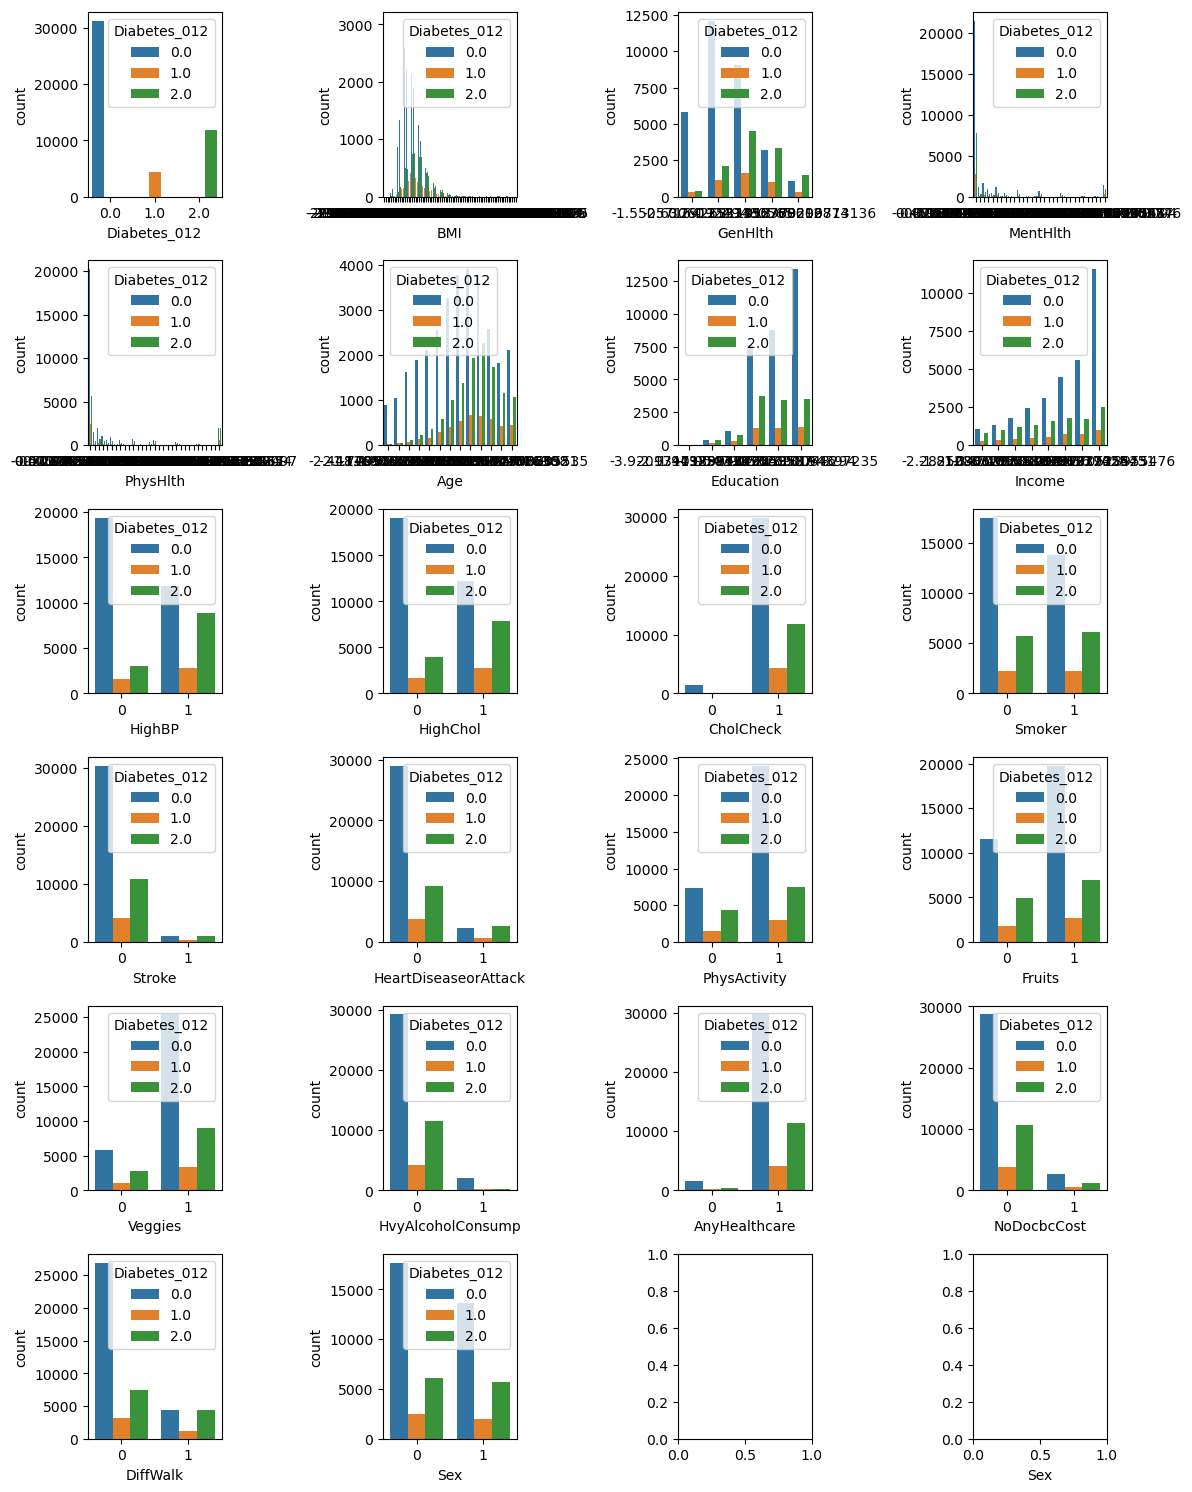

In [13]:
figure,axes=pl.subplots(6,4,figsize=(12,15))
axes=axes.flatten()
count=0
for i in train_df.columns:
    sn.countplot(data=train_df,x=i,ax=axes[count],hue='Diabetes_012')
    pl.xlabel(i)
    count+=1
pl.tight_layout()
pl.show()

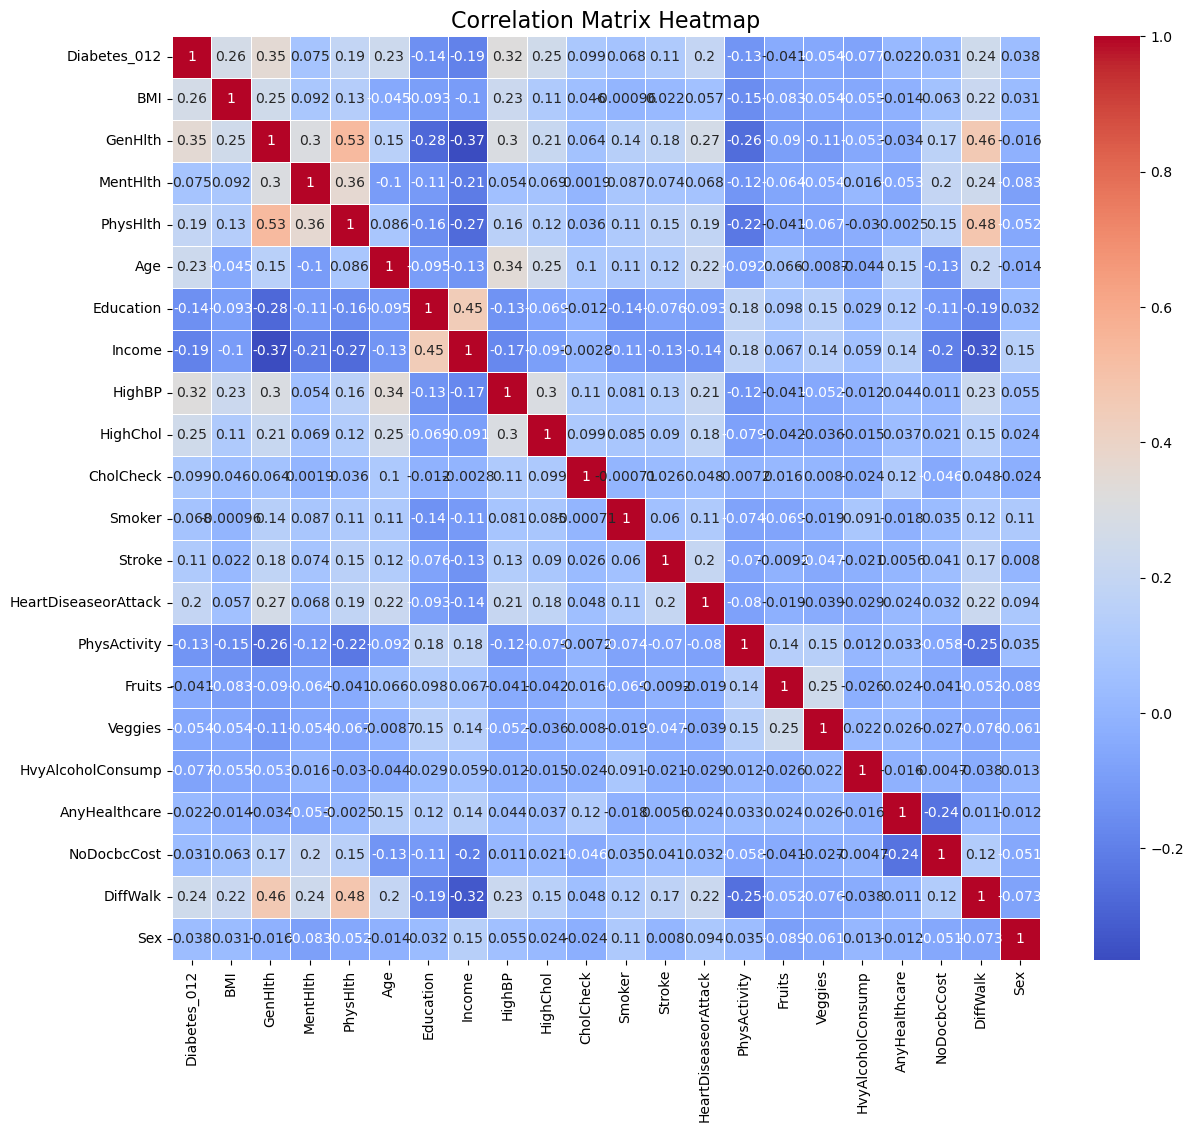

In [14]:
pl.figure(figsize=(14, 12))
correlation_matrix = train_df.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
pl.title('Correlation Matrix Heatmap', fontsize=16)
pl.show()

In [15]:

threshold = 0.1

correlations = train_df.corr()['Diabetes_012'].drop('Diabetes_012')
less_correlated_features = correlations[correlations.abs() < threshold].index.to_list()
print("Features less correlated with 'Diabetes_012' (below threshold {}):".format(threshold))

print(less_correlated_features)


Features less correlated with 'Diabetes_012' (below threshold 0.1):
['MentHlth', 'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex']


In [16]:
train_df = train_df.drop(columns=['MentHlth', 'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex'])

In [23]:
train_df['Diabetes_012'].value_counts()

0.0    31291
2.0    11842
1.0     4425
Name: Diabetes_012, dtype: int64

In [24]:
X = train_df.drop('Diabetes_012', axis=1)
y = train_df['Diabetes_012']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (33290, 12)
Testing set shape: (14268, 12)
Training labels shape: (33290,)
Testing labels shape: (14268,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Defining the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForestClassifier' : RandomForestClassifier(random_state=42)
}

# Training and evaluating each classifier
for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_rep}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.6993972525932156
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      9379
         1.0       0.00      0.00      0.00      1347
         2.0       0.54      0.43      0.48      3542

    accuracy                           0.70     14268
   macro avg       0.43      0.44      0.43     14268
weighted avg       0.62      0.70      0.65     14268


Training Decision Tree...
Decision Tree Accuracy: 0.5897813288477712
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      9379
         1.0       0.11      0.13      0.12      1347
         2.0       0.39      0.38      0.39      3542

    accuracy                           0.59     14268
   macro avg       0.42      0.41      0.41     14268
weighted avg       0.59      0.59      0.59     14268


Train

It's Been that logistic regression performance is slightly better

Hyperparameters tuning

In [28]:
from sklearn.model_selection import GridSearchCV


logistic_model = LogisticRegression()

# Defining the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


Using Class_weight = 'balanced' to balanced the dataset

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Creatimg a Logistic Regression model with the best hyperparameters
best_logreg_model = LogisticRegression(class_weight='balanced',C=0.01, penalty='l2', random_state=42)

best_logreg_model.fit(X_train, y_train)

y_pred = best_logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6010
Precision: 0.6943
Recall: 0.6010
F1 Score: 0.6353
Confusion Matrix:
[[6133 1621 1625]
 [ 393  374  580]
 [ 653  821 2068]]


Alhough it's didnt performed well

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_classifier = RandomForestClassifier()

# Defining the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)


random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_rf_model = random_search.best_estimator_

Best Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 197}


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Using the best hyperparameters from RandomizedSearchCV
best_rf_params = {
    'bootstrap': True,
    'criterion': 'gini',
    'max_depth': 19,
    'min_samples_leaf': 11,
    'min_samples_split': 12,
    'n_estimators': 97
}

final_rf_model = RandomForestClassifier(**best_rf_params)

final_rf_model.fit(X_train, y_train)

y_pred = final_rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the classification report, confusion matrix, and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.91      0.82      9379
         1.0       0.00      0.00      0.00      1347
         2.0       0.55      0.44      0.49      3542

    accuracy                           0.70     14268
   macro avg       0.43      0.45      0.43     14268
weighted avg       0.62      0.70      0.66     14268

Confusion Matrix:
 [[8493    0  886]
 [ 951    0  396]
 [1987    0 1555]]
Accuracy Score: 0.7042332492290441


From the above as we can see that model does improve a bit

Now I am trying to balance the dataset using a method called SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled Shape: {X_train_resampled.shape}, {y_train_resampled.shape}")


Original Shape: (33290, 12), (33290,)
Resampled Shape: (65736, 12), (65736,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=15, stratify=y_train_resampled)

In [34]:
# from sklearn.ensemble import RandomForestClassifier

# # Use the best hyperparameters from RandomizedSearchCV
# best_rf_params = {
#     'bootstrap': True,
#     'criterion': 'gini',
#     'max_depth': 19,
#     'min_samples_leaf': 11,
#     'min_samples_split': 12,
#     'n_estimators': 97
# }

# # Create the Random Forest classifier with the best hyperparameters
# final_rf_model = RandomForestClassifier(**best_rf_params)

# # Fit the model on the training data
# final_rf_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = final_rf_model.predict(X_test)

# # Evaluate the model
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Print the classification report, confusion matrix, and accuracy score
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [35]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForestClassifier' : RandomForestClassifier(random_state=42)
}

for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_rep}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.5317919075144508
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      4383
         1.0       0.45      0.40      0.42      4383
         2.0       0.53      0.55      0.54      4382

    accuracy                           0.53     13148
   macro avg       0.53      0.53      0.53     13148
weighted avg       0.53      0.53      0.53     13148


Training Decision Tree...
Decision Tree Accuracy: 0.6890781867964709
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      4383
         1.0       0.71      0.73      0.72      4383
         2.0       0.64      0.62      0.63      4382

    accuracy                           0.69     13148
   macro avg       0.69      0.69      0.69     13148
weighted avg       0.69      0.69      0.69     13148


Train

Randomforest , KNN , XGBoost, DecisionTree performance get improved